In [1]:
import os
import sys
import argparse
import torch
from getdist import plots, MCSamples
import getdist
import numpy as np
from scipy.stats import multivariate_normal

In [2]:
path = os.path.realpath(os.path.join(os.getcwd(), '../..'))
sys.path.insert(0, path)

In [3]:
from nnest import NestedSampler

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [5]:
# Himmelblau
dims = 2
def loglike(z):
    z1 = z[:, 0]
    z2 = z[:, 1]
    return - (z1**2 + z2 - 11.)**2 - (z1 + z2**2 - 7.)**2
def transform(x):
    return 5. * x

In [6]:
# Rosenbrock
#dims = 4
#def loglike(z):
#    return np.array([-sum(100.0 * (x[1:] - x[:-1] ** 2.0) ** 2.0 + (1 - x[:-1]) ** 2.0) for x in z])
#def transform(x):
#    return 5. * x

In [7]:
# Gauss
#corr = 0.99
#dims = 2
#def loglike(x):
#    return multivariate_normal.logpdf(x, mean=np.zeros(dims), cov=np.eye(dims) + corr * (1 - np.eye(dims)))
#def transform(x):
#    return 3. * x

In [8]:
sampler = NestedSampler(dims, loglike, transform=transform, num_live_points=1000, hidden_dim=128, num_layers=1, num_blocks=5, scale='', flow='spline')

Creating directory for new run logs/test/run44
[nnest.trainer] [INFO] SingleSpeedSpline(
  (flow): NormalizingFlow(
    (flows): ModuleList(
      (0): ActNorm()
      (1): Invertible1x1Conv()
      (2): NSF_CL(
        (f1): MLP(
          (net): Sequential(
            (0): Linear(in_features=1, out_features=16, bias=True)
            (1): LeakyReLU(negative_slope=0.2)
            (2): Linear(in_features=16, out_features=16, bias=True)
            (3): LeakyReLU(negative_slope=0.2)
            (4): Linear(in_features=16, out_features=16, bias=True)
            (5): LeakyReLU(negative_slope=0.2)
            (6): Linear(in_features=16, out_features=23, bias=True)
          )
        )
        (f2): MLP(
          (net): Sequential(
            (0): Linear(in_features=1, out_features=16, bias=True)
            (1): LeakyReLU(negative_slope=0.2)
            (2): Linear(in_features=16, out_features=16, bias=True)
            (3): LeakyReLU(negative_slope=0.2)
            (4): Linear(in_fe

In [9]:
sampler.run()

[nnest.sampler] [INFO] MCMC steps [10]
[nnest.sampler] [INFO] Initial scale [1.4142]
[nnest.sampler] [INFO] Volume switch [-1.0000]
[nnest.trainer] [INFO] Number of training samples [1000]
[nnest.trainer] [INFO] Training jitter [0.0032]
[nnest.trainer] [INFO] Epoch [1] train loss [0.0188] validation loss [0.0184]
[nnest.trainer] [INFO] Epoch [50] train loss [0.0158] validation loss [0.0156]
[nnest.trainer] [INFO] Epoch [100] train loss [0.0149] validation loss [0.0150]
[nnest.trainer] [INFO] Epoch [150] train loss [0.0145] validation loss [0.0148]
[nnest.trainer] [INFO] Epoch [200] train loss [0.0143] validation loss [0.0148]
[nnest.trainer] [INFO] Epoch [250] train loss [0.0142] validation loss [0.0148]
[nnest.trainer] [INFO] Epoch [300] train loss [0.0141] validation loss [0.0148]
[nnest.trainer] [INFO] Epoch [338] ran out of patience
[nnest.trainer] [INFO] Best epoch [288] validation loss [0.0148]
[nnest.sampler] [INFO] Step [0] loglstar [-8.2942e+02] max logl [-5.5946e-01] logz [-8

[nnest.sampler] [INFO] Acceptance [0.4200] min ESS [2.8059] max ESS [4.8982] average jump distance [0.1888]
[nnest.sampler] [INFO] Step [4400] loglstar [-2.7416e+00] maxlogl [-1.0018e-02] logz [-8.1058e+00] vol [1.22773e-02] ncalls [26629] scale [0.7383]
[nnest.sampler] [INFO] Acceptance [0.6000] min ESS [1.3101] max ESS [1.8380] average jump distance [0.0384]
[nnest.sampler] [INFO] Step [4600] loglstar [-2.2203e+00] maxlogl [-1.0306e-03] logz [-7.6217e+00] vol [1.00518e-02] ncalls [28263] scale [0.6570]
[nnest.sampler] [INFO] Acceptance [0.5200] min ESS [1.7677] max ESS [2.2342] average jump distance [0.0434]
[nnest.sampler] [INFO] Step [4800] loglstar [-1.8232e+00] maxlogl [-1.0306e-03] logz [-7.2222e+00] vol [8.22975e-03] ncalls [29890] scale [0.5117]
[nnest.trainer] [INFO] Number of training samples [1000]
[nnest.trainer] [INFO] Training jitter [0.0002]
[nnest.trainer] [INFO] Epoch [1] train loss [-0.0273] validation loss [-0.0279]
[nnest.trainer] [INFO] Epoch [50] train loss [-0.0

In [10]:
print(sampler.logz)

-5.4174098123220364


In [11]:
mc = MCSamples(samples=sampler.samples, weights=sampler.weights, loglikes=sampler.loglikes)

Removed no burn in


In [12]:
print(mc.getEffectiveSamples())
print(mc.getMargeStats())

3169.9060389968804
Marginalized limits: 0.68; 0.95; 0.99

parameter   mean           sddev          lower1         upper1         limit1 lower2         upper2         limit2 lower3         upper3         limit3 
param1      1.0251868E+00  3.0992478E+00 -3.8051630E+00  3.7174809E+00  two   -3.9412988E+00  3.7905761E+00  two   -4.0032051E+00  3.8409832E+00  two     p_{1}
param2      3.3397099E-01  2.4097063E+00 -3.3390779E+00  3.2576179E+00  two   -3.4857069E+00  3.3686362E+00  two   -3.4560993E+00  3.3494627E+00  two     p_{2}



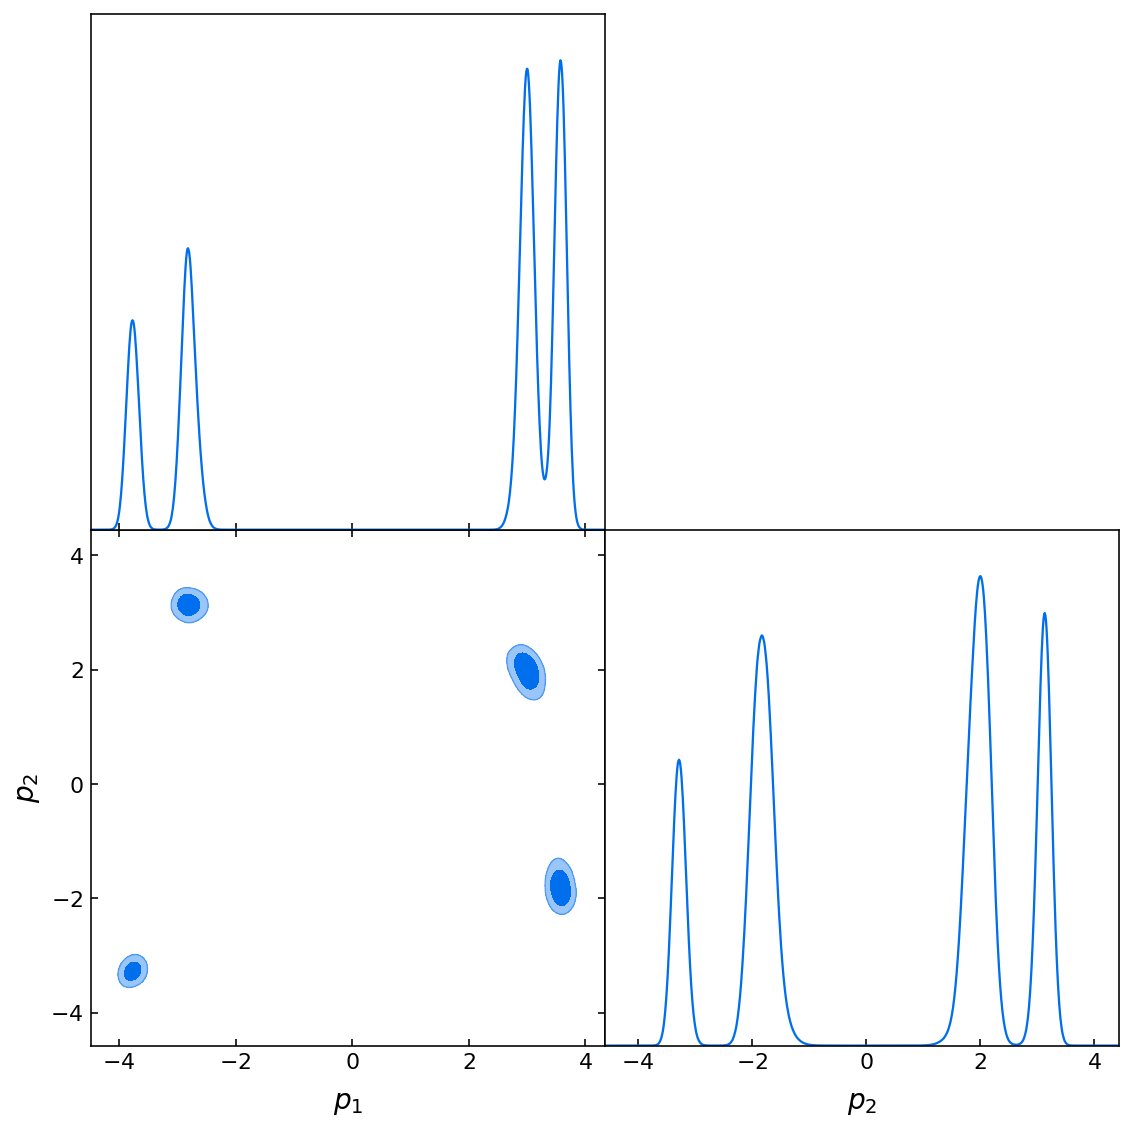

In [13]:
g = plots.getSubplotPlotter(width_inch=8)
g.triangle_plot(mc, filled=True)